# Econ 425T Homework 3

AUTHOR：Ruoxuan Yan

UID: 506082695

## 1. ISL Exercise 4.8.1

Because $p(X) = \frac{e^{\beta_0+\beta_1X}}{1 + e^{\beta_0+\beta_1X}}  (4.2)$, $1 - p(X) = \frac{1}{1 + e^{\beta_0+\beta_1X}}$. 

Plug into (4.3) we can get that $\frac{p(X)}{1-p(X)} = \frac{\frac{e^{\beta_0+\beta_1X}}{1 + e^{\beta_0+\beta_1X}}}{\frac{1}{1 + e^{\beta_0+\beta_1X}}} = e^{\beta_0+\beta_1X}$.

## 2. ISL Exercise 4.8.6

### (a)

$\hat P = \frac{e^{\hat\beta_0+\hat\beta_1X_1+\hat\beta_2X_2}}{1 + e^{\hat\beta_0+\hat\beta_1X_1+\hat\beta_2X_2}} = \frac{e^{-6+0.05*40+1*3.5}}{1 + e^{-6+0.05*40+1*3.5}} = 0.378$

### (b)

Suppose he need to study for x hours. 

$e^{-6+0.05*x+1*3.5} = \frac{0.5}{1-0.5}$, we can get $x = \frac{6-3.5}{0.05} = 50$. 

So he need to study for 50 hours to have a 50% chance of getting an A in the class.

## 3. ISL Exercise 4.8.9

### (a)

The fraction of people will in fact default is equal to the probability of defaulting, and suppose the fraction is p. 

From the odds formula we can get $\frac{p}{1-p} = 0.37$, so $p = 0.27$.

### (b)

The odds that she will default is $\frac{0.16}{1-0.16} = 0.19$.

## 4. ISL Exercise 4.8.13 (a)-(i) 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
weekly = pd.read_csv('Weekly.csv')
weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


### (a)

In [4]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


<AxesSubplot:>

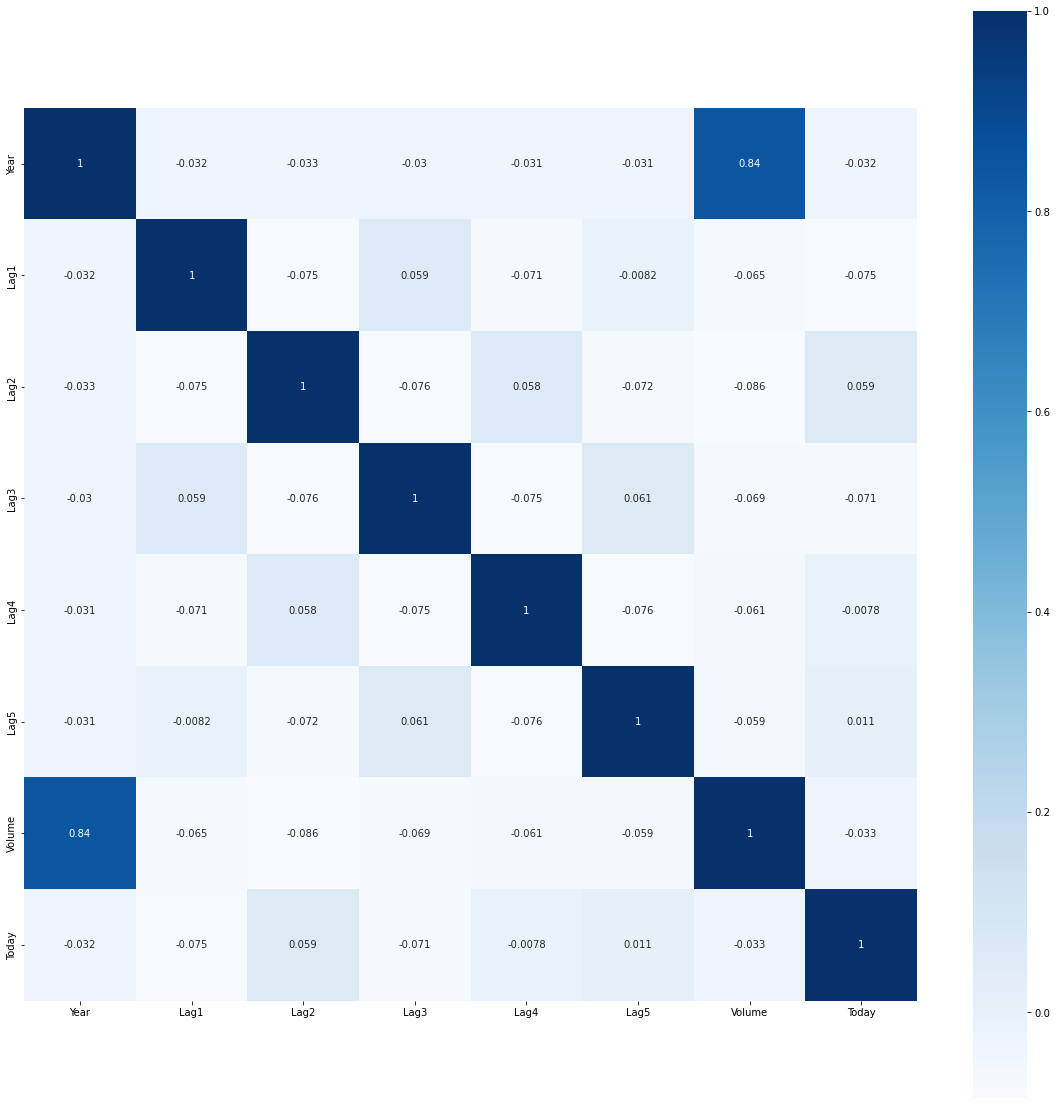

In [5]:
# correlation plot
corr = weekly.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap="Blues",annot=True,square = True)

There exist a strong positive correlation between year and volume. But other variables don't seem to exist any significant correlation. 

### (b)

In [6]:
import statsmodels.formula.api as smf

In [7]:
regdata = pd.get_dummies(weekly, columns=['Direction'], drop_first=True)
regdata

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1


In [8]:
reg_logit = smf.logit(formula='Direction_Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', 
                      data=regdata)
results_logit = reg_logit.fit()
results_logit.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 15 Feb 2023   Pseudo R-squ.:                0.006580
Time:                        21:39:24   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

The predictor Lag2 appear to be statistically significant because it has a p-value less than 0.05. 

### (c)

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

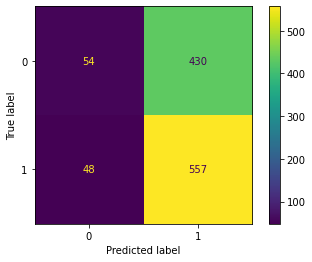

In [10]:
X_cols = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'] 
lr = LogisticRegression()
logit_mod = lr.fit(regdata[X_cols], regdata['Direction_Up'])
cm = confusion_matrix(regdata['Direction_Up'], logit_mod.predict(regdata[X_cols]))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

In [11]:
print('Accuracy =', lr.score(regdata[X_cols], regdata['Direction_Up']))

Accuracy = 0.5610651974288338


$\text{False positive rate} = \frac{FP}{FP + TN} = \frac{430}{430 + 54} = 88.84\%$

$\text{False negative rate} = \frac{FN}{TP + FN} = \frac{48}{557 + 48} = 7.93\%$

So the confusion matrix is telling me that the overall accuracy of the model is 56.1%. The model predict true up direction quit well because it has a low false negative rate of 7.93%. However it has a large false positive rate of 88.84%, it is bad in predicting true down direction. 

### (d)

In [12]:
train_data = regdata[regdata['Year'] <= 2008]
test_data = regdata[regdata['Year'] >= 2009]
test_data

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
985,2009,6.760,-1.698,0.926,0.418,-2.251,3.793110,-4.448,0
986,2009,-4.448,6.760,-1.698,0.926,0.418,5.043904,-4.518,0
987,2009,-4.518,-4.448,6.760,-1.698,0.926,5.948758,-2.137,0
988,2009,-2.137,-4.518,-4.448,6.760,-1.698,6.129763,-0.730,0
989,2009,-0.730,-2.137,-4.518,-4.448,6.760,5.602004,5.173,1
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1


In [13]:
reg_logit_1 = smf.logit(formula='Direction_Up ~ Lag2', 
                      data=train_data)
results_logit_1 = reg_logit_1.fit()
results_logit_1.summary()

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Wed, 15 Feb 2023   Pseudo R-squ.:                0.003076
Time:                        21:39:28   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.029      2.024      0.043       0.002       0.114
==============================================================================
"""

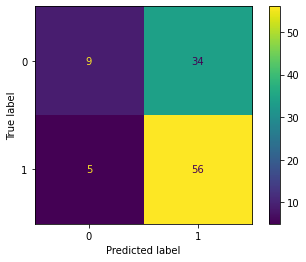

In [14]:
X_cols = ['Lag2']
logit_mod_1 = lr.fit(train_data[X_cols], train_data['Direction_Up'])
cm_1 = confusion_matrix(test_data['Direction_Up'], logit_mod_1.predict(test_data[X_cols]))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_1)
cm_display.plot()
plt.show()

In [15]:
print('Accuracy =', lr.score(test_data[X_cols], test_data['Direction_Up']))

Accuracy = 0.625


The overall fraction of correct predictions for the held out data is 62.5%.

### (e)

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

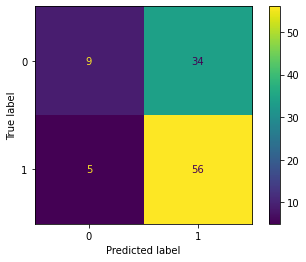

In [17]:
lda = LinearDiscriminantAnalysis()
lda_mod = lda.fit(train_data[X_cols], train_data['Direction_Up'])
cm_2 = confusion_matrix(test_data['Direction_Up'], lda_mod.predict(test_data[X_cols]))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_2)
cm_display.plot()
plt.show()

In [18]:
print('Accuracy =', lda.score(test_data[X_cols], test_data['Direction_Up']))

Accuracy = 0.625


### (f)

In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

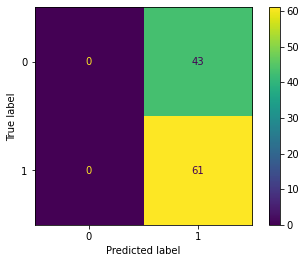

In [20]:
qda = QuadraticDiscriminantAnalysis()
qda_mod = qda.fit(train_data[X_cols], train_data['Direction_Up'])
cm_3 = confusion_matrix(test_data['Direction_Up'], qda_mod.predict(test_data[X_cols]))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_3)
cm_display.plot()
plt.show()

In [21]:
print('Accuracy =', qda.score(test_data[X_cols], test_data['Direction_Up']))

Accuracy = 0.5865384615384616


### (g)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

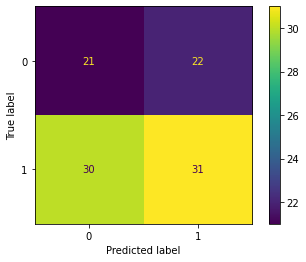

In [23]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn_mod = knn.fit(train_data[X_cols], train_data['Direction_Up'])
cm_3 = confusion_matrix(test_data['Direction_Up'], knn_mod.predict(test_data[X_cols]))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_3)
cm_display.plot()
plt.show()

In [24]:
print('Accuracy =', knn.score(test_data[X_cols], test_data['Direction_Up']))

Accuracy = 0.5


### (h)

In [25]:
from sklearn.naive_bayes import GaussianNB

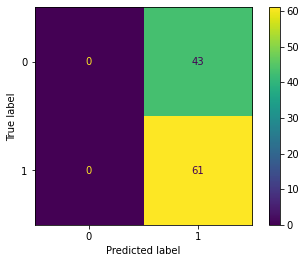

In [26]:
nb = GaussianNB()
nb_mod = nb.fit(train_data[X_cols], train_data['Direction_Up'])
cm_4 = confusion_matrix(test_data['Direction_Up'], nb_mod.predict(test_data[X_cols]))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_4)
cm_display.plot()
plt.show()

In [27]:
print('Accuracy =', nb.score(test_data[X_cols], test_data['Direction_Up']))

Accuracy = 0.5865384615384616


### (i)

Logistic regression model and LDA seem to provide the best results on this data with the highest accuracy score of 0.625.

## 5. Bonus question: ISL Exercise 4.8.13 Part (j)

In [33]:
import itertools
from sklearn.model_selection import GridSearchCV

In [99]:
# Generate different combination of predictors
predictors = train_data.drop(columns = ['Today','Direction_Up']).columns

# generate all possible combinations of the predictors
combinations = []
for i in range(1, len(predictors)+1):
    for combo in itertools.combinations(predictors, i):
        combinations.append(combo)

In [100]:
# convert combinations to a list of lists
combinations_list = list(map(list, combinations))

#for i in range(len(combinations_list)):
 #   combinations_list[i] = combinations_list[i][0]
    
# print combinations_list
print(combinations_list[45])

['Lag1', 'Lag2', 'Lag5']


In [101]:
# investigate different combination of predictors for model lr, lda, qda, nb
models = [lr, lda, qda, nb]
result = []
for mod in models:
    for X_cols in combinations_list:
        pre_mod = mod.fit(train_data[X_cols], train_data['Direction_Up'])
        result.append([mod, X_cols, mod.score(test_data[X_cols], test_data['Direction_Up'])])

In [102]:
df_result = pd.DataFrame(result)
df_result.columns =['method','predictors','accuracy']
df_result

,method,predictors,accuracy
0,LogisticRegression(),[Year],0.586538
1,LogisticRegression(),[Lag1],0.567308
2,LogisticRegression(),[Lag2],0.625000
3,LogisticRegression(),[Lag3],0.586538
4,LogisticRegression(),[Lag4],0.586538
...,...,...,...
503,GaussianNB(),"[Year, Lag1, Lag2, Lag4, Lag5, Volume]",0.423077
504,GaussianNB(),"[Year, Lag1, Lag3, Lag4, Lag5, Volume]",0.423077
505,GaussianNB(),"[Year, Lag2, Lag3, Lag4, Lag5, Volume]",0.432692
506,GaussianNB(),"[Lag1, Lag2, Lag3, Lag4, Lag5, Volume]",0.451923


In [103]:
# investigate different combination of predictors and K values for KNN
K = [*range(1,11,1)]
result = []
for k in K:
    for X_cols in combinations_list:
        mod = KNeighborsClassifier(n_neighbors = k)
        pre_mod = mod.fit(train_data[X_cols], train_data['Direction_Up'])
        result.append([k, X_cols, mod.score(test_data[X_cols], test_data['Direction_Up'])])

In [96]:
df_result_1 = pd.DataFrame(result)
df_result_1.columns =['K','predictors','accuracy']
df_result_1

,K,predictors,accuracy
0,1,[Year],0.413462
1,1,[Lag1],0.442308
2,1,[Lag2],0.500000
3,1,[Lag3],0.538462
4,1,[Lag4],0.500000
...,...,...,...
1265,10,"[Year, Lag1, Lag2, Lag4, Lag5, Volume]",0.432692
1266,10,"[Year, Lag1, Lag3, Lag4, Lag5, Volume]",0.432692
1267,10,"[Year, Lag2, Lag3, Lag4, Lag5, Volume]",0.586538
1268,10,"[Lag1, Lag2, Lag3, Lag4, Lag5, Volume]",0.548077


In [107]:
# Find the maximum accuracy value for different variables and method
best = df_result[df_result['accuracy'] == df_result['accuracy'].max()]
best

,method,predictors,accuracy
2,LogisticRegression(),[Lag2],0.625
8,LogisticRegression(),"[Year, Lag2]",0.625
18,LogisticRegression(),"[Lag2, Lag3]",0.625
19,LogisticRegression(),"[Lag2, Lag4]",0.625
33,LogisticRegression(),"[Year, Lag2, Lag3]",0.625
93,LogisticRegression(),"[Lag2, Lag3, Lag4, Lag5]",0.625
108,LogisticRegression(),"[Year, Lag2, Lag3, Lag4, Lag5]",0.625
129,LinearDiscriminantAnalysis(),[Lag2],0.625
145,LinearDiscriminantAnalysis(),"[Lag2, Lag3]",0.625
146,LinearDiscriminantAnalysis(),"[Lag2, Lag4]",0.625


In [118]:
best.index[0]

2

In [108]:
bestknn = df_result_1[df_result_1['accuracy'] == df_result_1['accuracy'].max()]
bestknn

,K,predictors,accuracy
313,3,"[Lag3, Lag4, Lag5]",0.625


From the analysis above, we can see that the highest accuracy score is 0.625 and the combination of variables and method are on the table above.

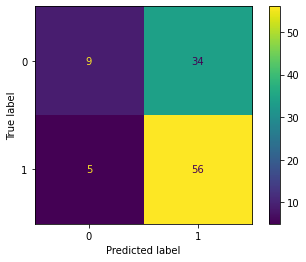

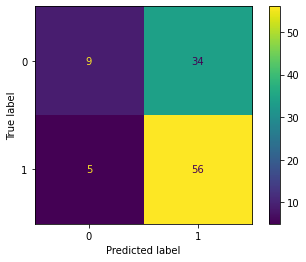

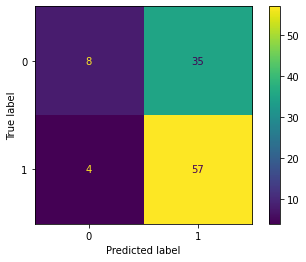

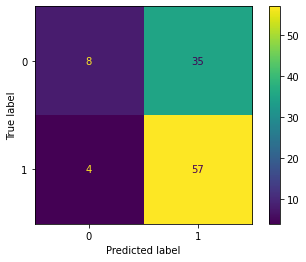

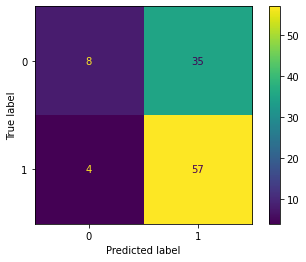

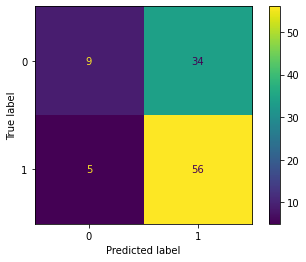

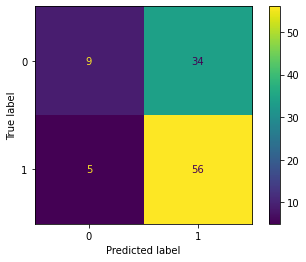

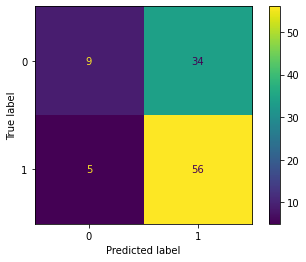

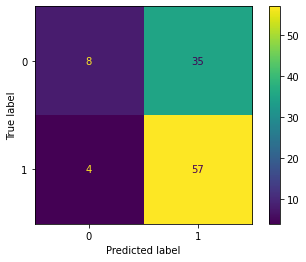

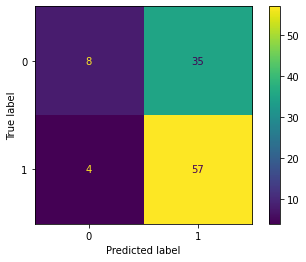

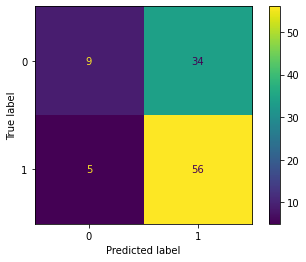

In [123]:
# Plot confusion matrix
for i in range(len(best)):
    mod = best.iloc[i,0]
    X_cols = best.iloc[i,1]
    pre_mod = mod.fit(train_data[X_cols], train_data['Direction_Up'])
    cm = confusion_matrix(test_data['Direction_Up'], pre_mod.predict(test_data[X_cols]))
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
    cm_display.plot()
    plt.show()

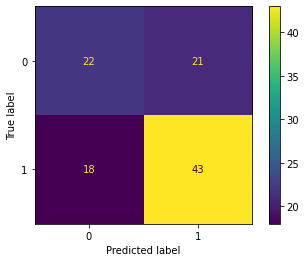

In [130]:
X_cols = bestknn.iloc[0,1]
knn = KNeighborsClassifier(n_neighbors = 3)
knn_mod = knn.fit(train_data[X_cols], train_data['Direction_Up'])
cm = confusion_matrix(test_data['Direction_Up'], knn_mod.predict(test_data[X_cols]))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

## 6. Bonus question: ISL Exercise 4.8.4 

### （a）

Because around the boundaries, we cannot take fully 10% interval of $[x−0.05,x+0.05]$, so using intergral to do the calculation: $\int_{0}^{0.05}(x+0.05)dx + \int_{0.95}^{1}(-x+1.05)dx + \int_{0.05}^{0.95}0.1dx = 0.0975$. On average, 9.75% of the available observations we will use to make the prediction.

### (b)

Suppose $X_1$ and $X_2$ are independent, the fraction of the available observations will we use is $0.0975 * 0.0975 = 0.00951$. So only 0.95% of the available observations we will use to make the prediction.

### (c)

Similarly to part (b), the fraction of the available observations will we use is $0.0975^{100} \simeq 0$.

### (d)

From parts (a)–(c), we can see that as the number of features p increases, the fraction of the available observations we use decreases dramatically. Suppose we use the observations within t of the range and $0<t<1$, when $p \rightarrow \infty$, $\lim_{p\rightarrow\infty}t^p \rightarrow 0$. So when p is large, there are very few training observations “near” any given test observation.

### (e)

When $p = 1$, the length is $10\%$. Suppose the length is $x$. When $p = 2$, $x^2 = 10\%$, so $x = \sqrt{10\%} = 31.62\%$. When $p = 100$, $x^{100} = 10\%$, so $x = 10\%^{\frac{1}{100}} = 97.72\%$. So when the dimension p increases, we need to use a larger length of each side of the hypercube to achieve using 10% of the training observations.